### SatelliteBench

* [Dataset](https://physionet.org/content/multimodal-satellite-data/1.0.0/)

* [Paper](https://arxiv.org/abs/2401.11114)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/satellitedata/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['text', 'image_id'], inplace=True)
df.Labels = df.Labels.astype(str)
df.head()

,Labels,split,image_embedding_0,image_embedding_1,image_embedding_2,image_embedding_3,image_embedding_4,image_embedding_5,image_embedding_6,image_embedding_7,...,text_embedding_504,text_embedding_505,text_embedding_506,text_embedding_507,text_embedding_508,text_embedding_509,text_embedding_510,text_embedding_511,Labels_4,Labels_3
0,1,train,-0.000648,0.047631,-0.007688,-0.015954,0.033954,-0.024987,0.008623,0.077579,...,0.014448,0.025682,0.010953,0.002404,0.021032,0.009018,0.002254,-0.014104,3,2
1,1,train,0.017359,0.030042,0.016325,-0.010410,0.046289,-0.025459,-0.002872,0.065161,...,0.012622,0.030623,0.007002,0.006732,0.010945,-0.010793,-0.000270,-0.012476,1,1
2,0,train,-0.022790,0.021263,0.040344,-0.016606,0.041269,-0.028196,0.012908,0.048379,...,-0.014684,0.023051,0.005047,0.000785,0.005979,-0.020611,-0.006694,0.008903,1,0
3,0,train,-0.013127,-0.022996,-0.049374,-0.006306,0.013601,-0.003762,-0.033799,0.111063,...,-0.011703,0.025439,0.004510,-0.007244,0.005063,0.042533,-0.002328,-0.006062,1,1
4,0,train,-0.034772,0.040687,0.007086,-0.026446,0.017892,-0.021177,0.013868,0.056864,...,0.022611,0.020556,0.020584,-0.001789,0.015643,-0.005070,0.008810,0.005491,1,0


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'Labels'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (936, 1028)
Test Shape: (312, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.50 MB
The number of parameters of the model are: 131714


STAGE:2024-02-08 22:05:22 14989:14989 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.4615, macro-f1: 0.3158
Epoch 1/30 - Training Time: 0.18 seconds | Inference Time: 0.08 seconds
Epoch 2/30 - Test Accuracy: 0.5833, macro-f1: 0.5831
Epoch 2/30 - Training Time: 0.15 seconds | Inference Time: 0.07 seconds
Epoch 3/30 - Test Accuracy: 0.6635, macro-f1: 0.6451
Epoch 3/30 - Training Time: 0.14 seconds | Inference Time: 0.08 seconds
Epoch 4/30 - Test Accuracy: 0.6378, macro-f1: 0.6321
Epoch 4/30 - Training Time: 0.15 seconds | Inference Time: 0.09 seconds
Epoch 5/30 - Test Accuracy: 0.6763, macro-f1: 0.6762
Epoch 5/30 - Training Time: 0.14 seconds | Inference Time: 0.07 seconds
Epoch 6/30 - Test Accuracy: 0.6891, macro-f1: 0.6721
Epoch 6/30 - Training Time: 0.15 seconds | Inference Time: 0.09 seconds
Epoch 7/30 - Test Accuracy: 0.6442, macro-f1: 0.6442
Epoch 7/30 - Training Time: 0.15 seconds | Inference Time: 0.09 seconds
Epoch 8/30 - Test Accuracy: 0.6955, macro-f1: 0.6955
Epoch 8/30 - Training Time: 0.16 seconds | Inference Time: 0.08 seconds


STAGE:2024-02-08 22:05:30 14989:14989 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 22:05:30 14989:14989 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        52.78%        2.915s        53.14%        2.935s       4.447ms     146.32 Mb     146.11 Mb           660  
                                         training_batch         5.84%     322.247ms        41.15%        2.272s       5.050ms    -110.06 Mb    -112.19 Mb           450  
                              Optimizer.step#AdamW.step         4.30%     237.210ms        18.78%        1.037s       2.305ms       1.00 Mb    -450.65

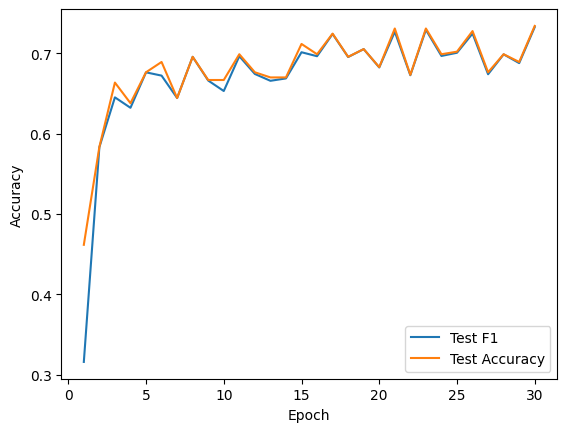

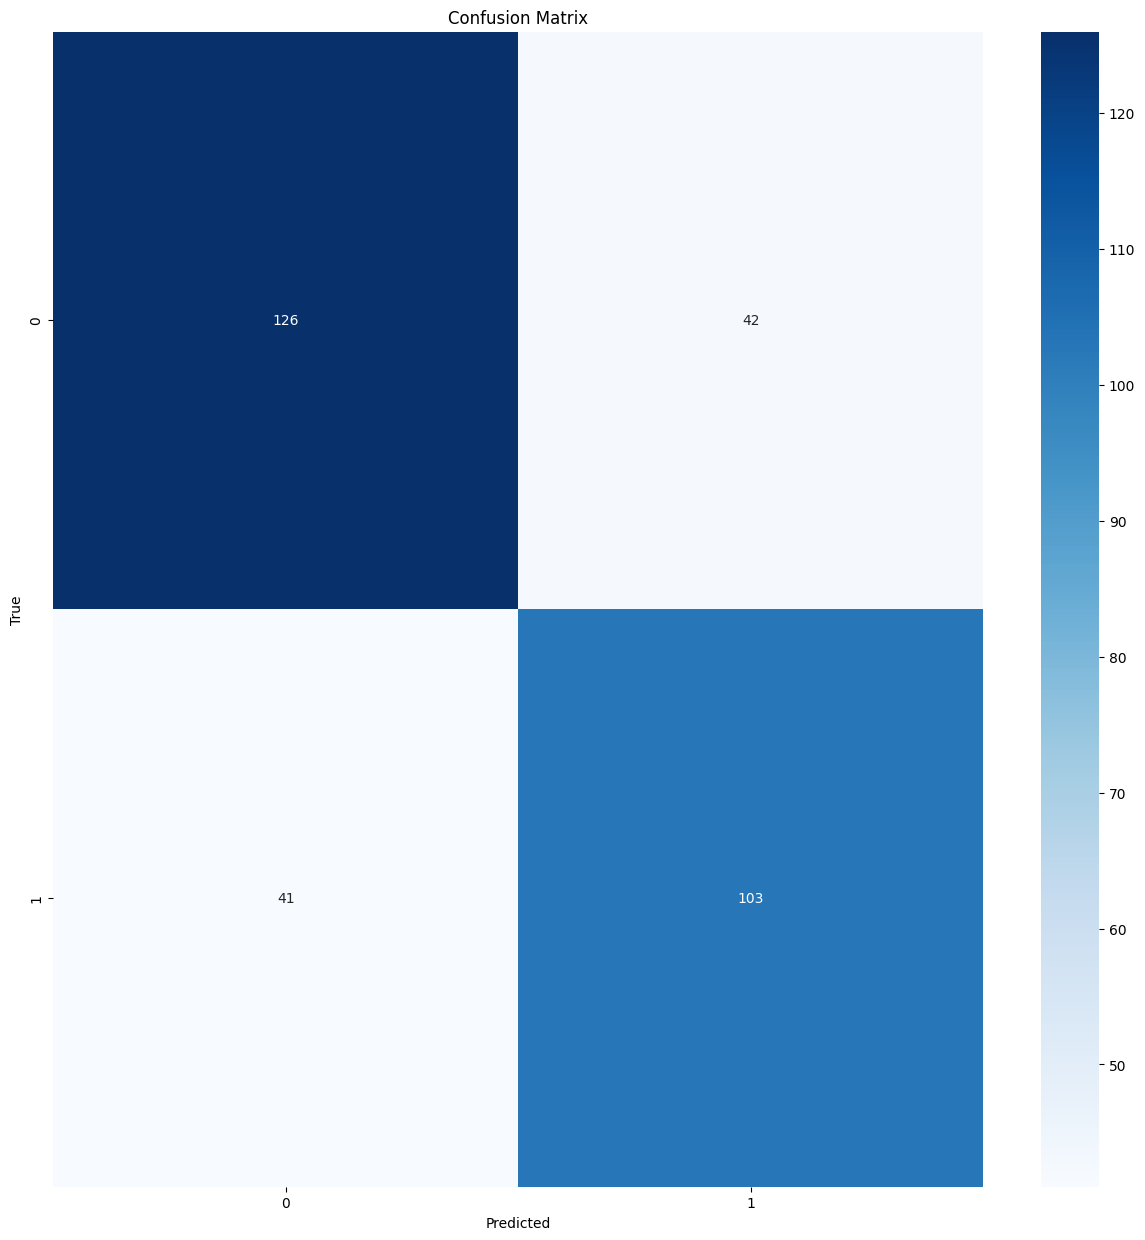

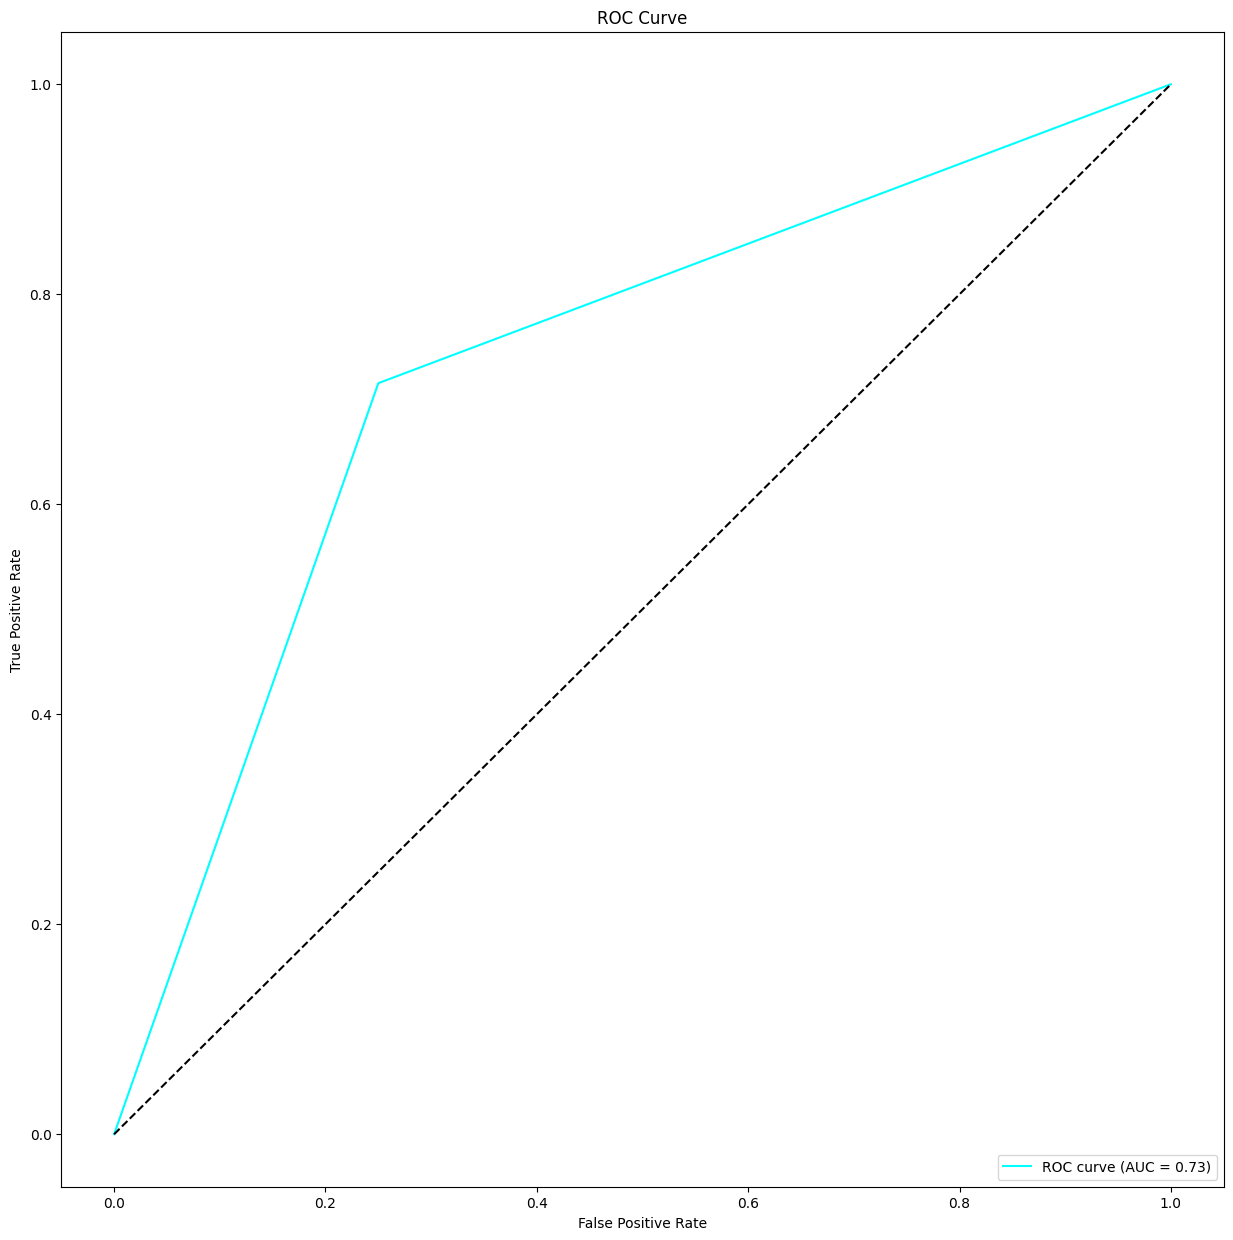

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       168
           1       0.71      0.72      0.71       144

    accuracy                           0.73       312
   macro avg       0.73      0.73      0.73       312
weighted avg       0.73      0.73      0.73       312



In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 0.25 MB
The number of parameters of the model are: 66178


STAGE:2024-02-08 22:05:50 14989:14989 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/30 - Test Accuracy: 0.4679, macro-f1: 0.3520
Epoch 1/30 - Training Time: 0.23 seconds | Inference Time: 0.11 seconds
Epoch 2/30 - Test Accuracy: 0.5545, macro-f1: 0.5380
Epoch 2/30 - Training Time: 0.19 seconds | Inference Time: 0.11 seconds
Epoch 3/30 - Test Accuracy: 0.6474, macro-f1: 0.6396
Epoch 3/30 - Training Time: 0.22 seconds | Inference Time: 0.12 seconds
Epoch 4/30 - Test Accuracy: 0.5994, macro-f1: 0.5984
Epoch 4/30 - Training Time: 0.21 seconds | Inference Time: 0.12 seconds
Epoch 5/30 - Test Accuracy: 0.6474, macro-f1: 0.6319
Epoch 5/30 - Training Time: 0.21 seconds | Inference Time: 0.10 seconds
Epoch 6/30 - Test Accuracy: 0.6571, macro-f1: 0.6570
Epoch 6/30 - Training Time: 0.23 seconds | Inference Time: 0.11 seconds
Epoch 7/30 - Test Accuracy: 0.6186, macro-f1: 0.6175
Epoch 7/30 - Training Time: 0.24 seconds | Inference Time: 0.11 seconds
Epoch 8/30 - Test Accuracy: 0.6635, macro-f1: 0.6575
Epoch 8/30 - Training Time: 0.20 seconds | Inference Time: 0.11 seconds


STAGE:2024-02-08 22:06:00 14989:14989 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-08 22:06:00 14989:14989 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        51.14%        3.621s        51.43%        3.641s       5.516ms     146.32 Mb     146.11 Mb           660  
                                         training_batch         6.22%     440.488ms        48.47%        3.431s       5.719ms    -145.44 Mb    -146.80 Mb           600  
                              Optimizer.step#AdamW.step         4.87%     344.949ms        21.58%        1.528s       3.396ms     517.05 Kb    -225.30

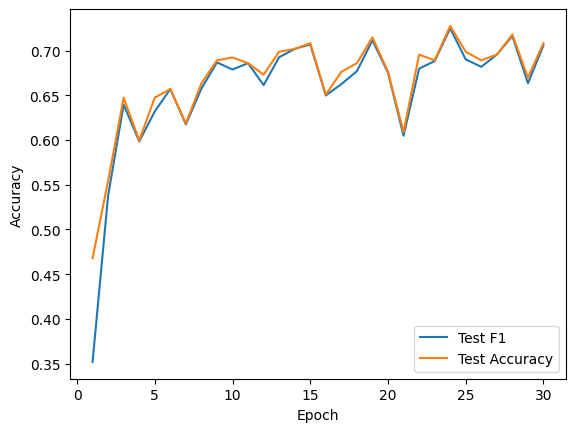

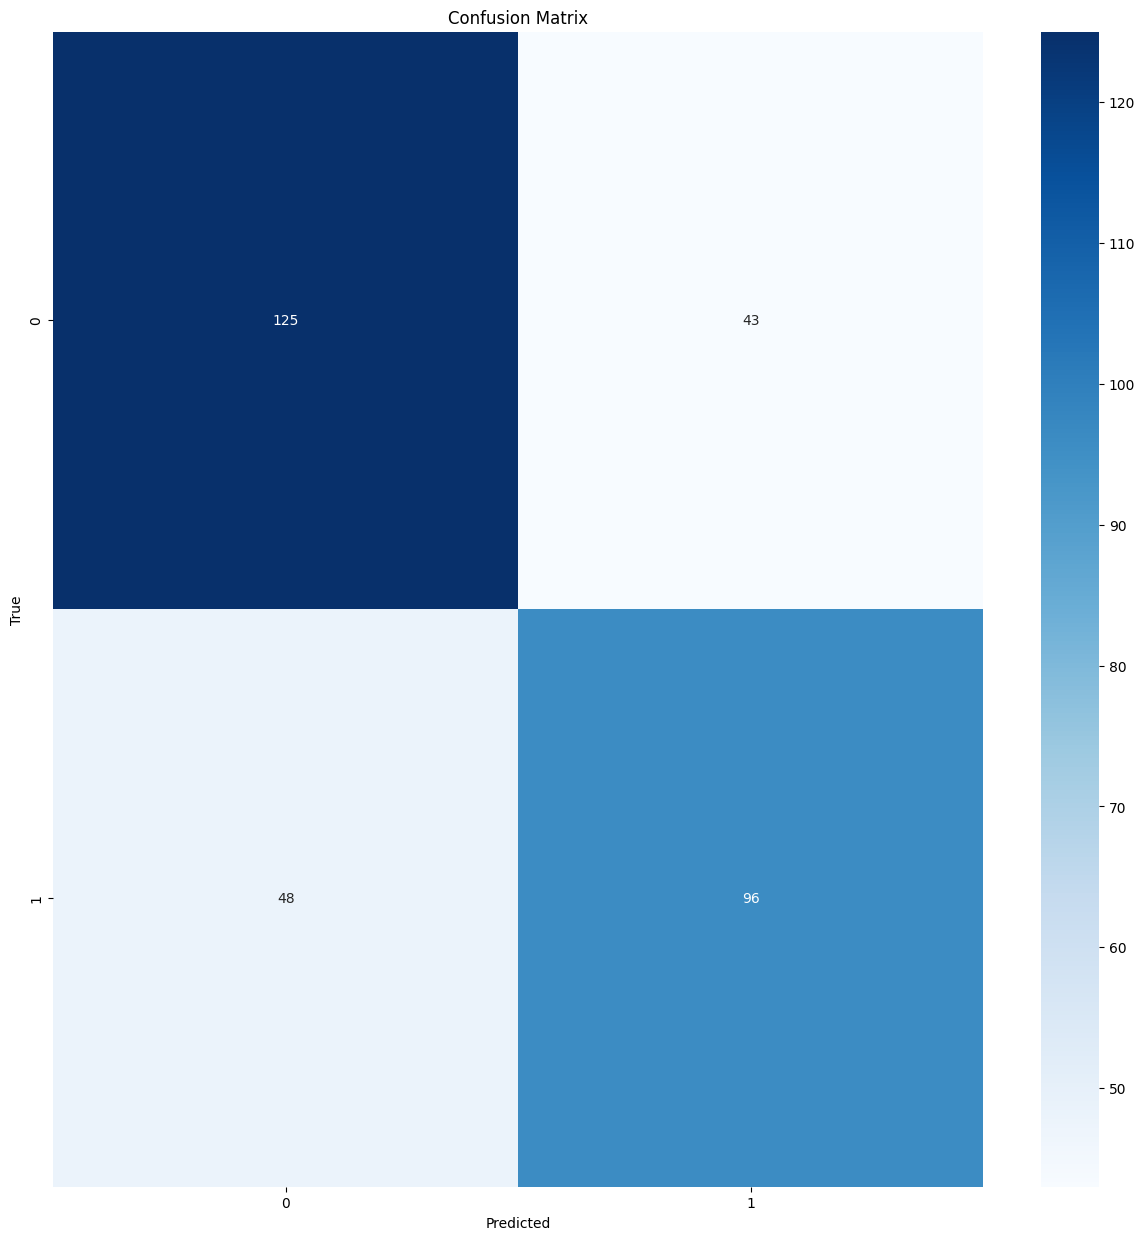

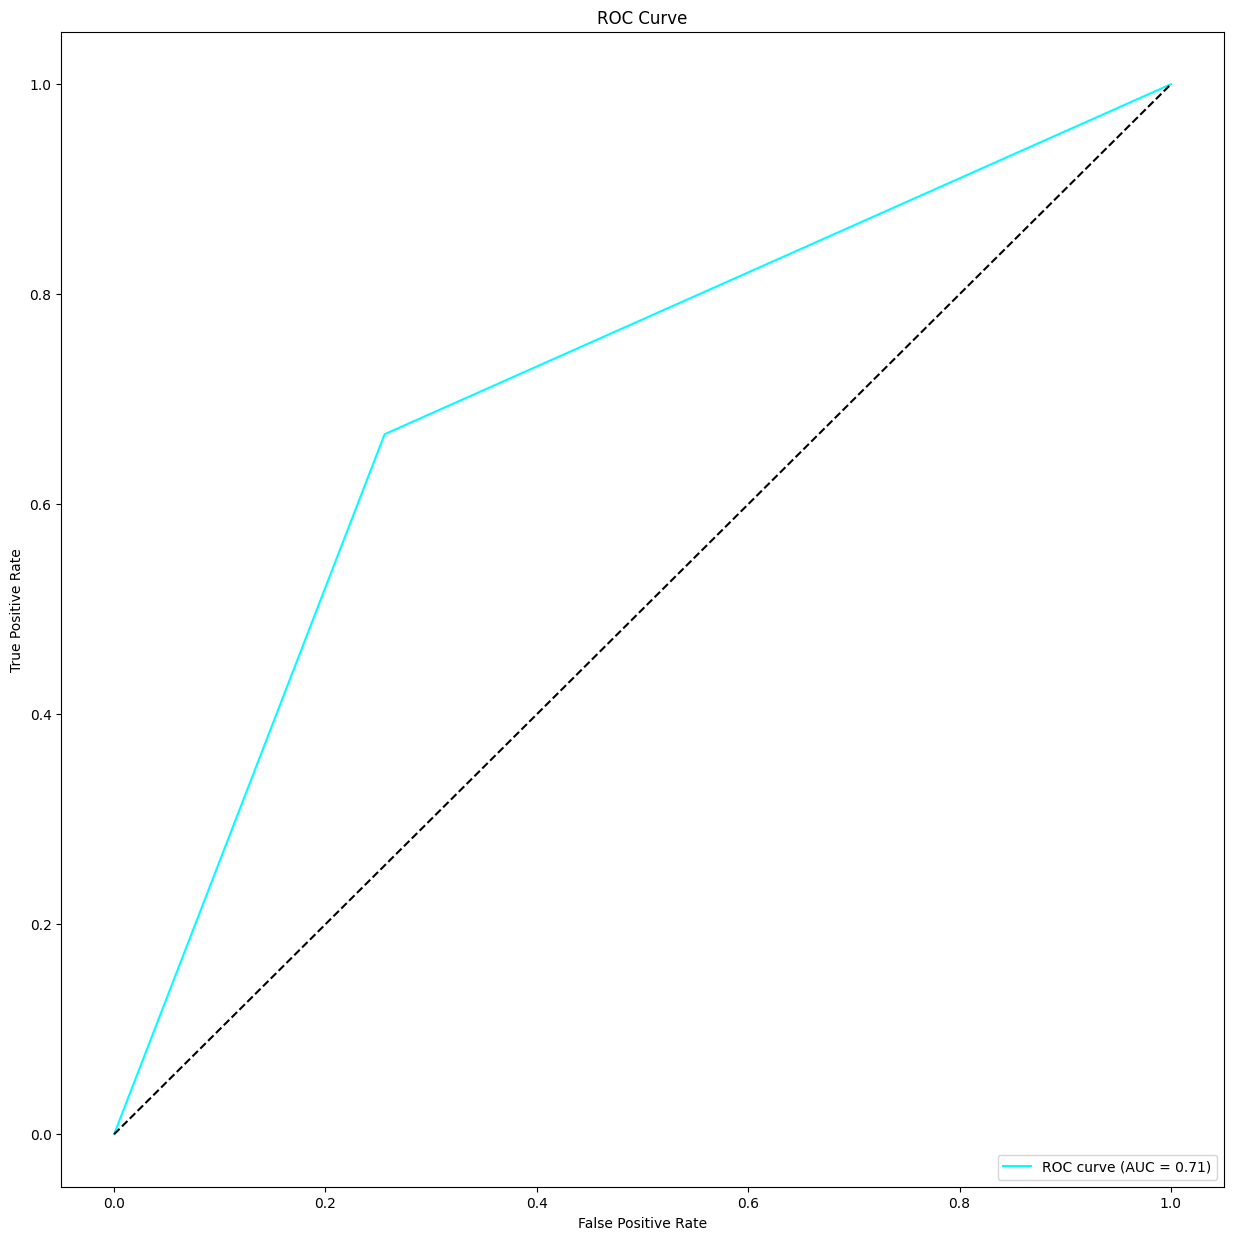

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       168
           1       0.69      0.67      0.68       144

    accuracy                           0.71       312
   macro avg       0.71      0.71      0.71       312
weighted avg       0.71      0.71      0.71       312



In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=30, multilabel=multilabel, report=True)